<a href="https://colab.research.google.com/github/sayalikamble4567/2026-BUS4-118S-Sec-02-Special-Topics-MIS/blob/main/class_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sqlalchemy import create_engine  # Only for database example

# ---- 1. Load data from CSV ----
csv_data = pd.read_csv('sample_data.csv')
print(" CSV Data Loaded:")
print(csv_data.head())

# ---- 2. Load data from Excel ----
excel_data = pd.read_excel('sample_data.xlsx', engine='openpyxl')
print("\n Excel Data Loaded:")
print(excel_data.head())

# ---- 3. Load data from a SQL database (Optional demo) ----
# Example using SQLite for demonstration
# Create a connection (replace with your DB URI)
engine = create_engine('sqlite:///example.db')  # Assumes example.db exists
# sql_data = pd.read_sql('SELECT * FROM your_table', engine)
# print("\n SQL Data Loaded:")
# print(sql_data.head())

# ---- Basic Data Exploration ----
print("\n First 5 Rows:")
print(csv_data.head())

print("\n Last 5 Rows:")
print(csv_data.tail())

print("\n Info:")
csv_data.info()

print("\n Summary Statistics:")
print(csv_data.describe())

 CSV Data Loaded:
      Name  Age  Score
0    Alice   23     85
1      Bob   27     90
2  Charlie   22     78
3    Diana   25     88
4    Ethan   24     92

 Excel Data Loaded:
      Name  Age  Score
0    Alice   23     85
1      Bob   27     90
2  Charlie   22     78
3    Diana   25     88
4    Ethan   24     92

 First 5 Rows:
      Name  Age  Score
0    Alice   23     85
1      Bob   27     90
2  Charlie   22     78
3    Diana   25     88
4    Ethan   24     92

 Last 5 Rows:
      Name  Age  Score
0    Alice   23     85
1      Bob   27     90
2  Charlie   22     78
3    Diana   25     88
4    Ethan   24     92

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Score   5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes

 Summary Statistics:
             

In [2]:
import pandas as pd
import numpy as np

# Sample raw dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', None, 'Ethan'],
    'Age': [23, np.nan, 22, 25, 24],
    'Score': ['85', '90', None, '88', '92'],
    'City': ['New York', 'Los Angeles', None, 'Chicago', 'Houston']
}

df = pd.DataFrame(data)

print(" Raw Data:")
print(df)

# ---- 1. Handling Missing Values ----

# Drop rows with any missing values
df_dropped = df.dropna()
print("\n Dropped Rows with Any Missing Values:")
print(df_dropped)

# Fill missing values with a default value
df_filled = df.fillna({'Name': 'Unknown', 'Age': df['Age'].mean(), 'Score': '0', 'City': 'Unknown'})
print("\n Filled Missing Values:")
print(df_filled)

# ---- 2. Data Type Conversion ----

# Convert 'Score' column from string to integer
df_filled['Score'] = df_filled['Score'].astype(int)

print("\n After Converting 'Score' to Integer:")
print(df_filled.dtypes)

# ---- 3. Data Filtering ----

# Filter rows where Age is greater than 23
filtered_df = df_filled[df_filled['Age'] > 23]
print("\n Filtered Rows (Age > 23):")
print(filtered_df)

# ---- 4. Data Transformation ----

# Add a new column with upper-case city names
df_filled['City_Upper'] = df_filled['City'].str.upper()

# Add a calculated column: Age * Score
df_filled['Performance'] = df_filled['Age'] * df_filled['Score']

print("\n Transformed Data:")
print(df_filled)


 Raw Data:
      Name   Age Score         City
0    Alice  23.0    85     New York
1      Bob   NaN    90  Los Angeles
2  Charlie  22.0  None         None
3     None  25.0    88      Chicago
4    Ethan  24.0    92      Houston

 Dropped Rows with Any Missing Values:
    Name   Age Score      City
0  Alice  23.0    85  New York
4  Ethan  24.0    92   Houston

 Filled Missing Values:
      Name   Age Score         City
0    Alice  23.0    85     New York
1      Bob  23.5    90  Los Angeles
2  Charlie  22.0     0      Unknown
3  Unknown  25.0    88      Chicago
4    Ethan  24.0    92      Houston

 After Converting 'Score' to Integer:
Name      object
Age      float64
Score      int64
City      object
dtype: object

 Filtered Rows (Age > 23):
      Name   Age  Score         City
1      Bob  23.5     90  Los Angeles
3  Unknown  25.0     88      Chicago
4    Ethan  24.0     92      Houston

 Transformed Data:
      Name   Age  Score         City   City_Upper  Performance
0    Alice  23.0   

In [3]:
import pandas as pd

# Sample dataset
data = {
    'Department': ['Sales', 'Sales', 'HR', 'HR', 'IT', 'IT', 'IT'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'Diana', 'Ethan', 'Fiona', 'George'],
    'Salary': [60000, 65000, 58000, 62000, 70000, 72000, 71000],
    'Bonus': [5000, 6000, 4000, 4500, 5500, 6000, 5800]
}

df = pd.DataFrame(data)

print(" Original Data:")
print(df)

# ---- 1. Grouping and Aggregation ----

# Group by Department and calculate mean Salary and Bonus
grouped = df.groupby('Department')[['Salary', 'Bonus']].mean()

print("\n Average Salary and Bonus by Department:")
print(grouped)

# You can also use multiple aggregation functions
grouped_multi = df.groupby('Department').agg({
    'Salary': ['mean', 'max'],
    'Bonus': 'sum'
})

print("\n Grouped with Multiple Aggregations:")
print(grouped_multi)

# ---- 2. Pivot Tables ----

# Create a pivot table to show average Salary by Department
pivot = pd.pivot_table(df, values='Salary', index='Department', aggfunc='mean')

print("\n Pivot Table - Average Salary by Department:")
print(pivot)

# Pivot Table with multiple values and aggregation
pivot_multi = pd.pivot_table(df, values=['Salary', 'Bonus'], index='Department', aggfunc='sum')

print("\n Pivot Table - Total Salary and Bonus by Department:")
print(pivot_multi)

 Original Data:
  Department Employee  Salary  Bonus
0      Sales    Alice   60000   5000
1      Sales      Bob   65000   6000
2         HR  Charlie   58000   4000
3         HR    Diana   62000   4500
4         IT    Ethan   70000   5500
5         IT    Fiona   72000   6000
6         IT   George   71000   5800

 Average Salary and Bonus by Department:
             Salary        Bonus
Department                      
HR          60000.0  4250.000000
IT          71000.0  5766.666667
Sales       62500.0  5500.000000

 Grouped with Multiple Aggregations:
             Salary         Bonus
               mean    max    sum
Department                       
HR          60000.0  62000   8500
IT          71000.0  72000  17300
Sales       62500.0  65000  11000

 Pivot Table - Average Salary by Department:
             Salary
Department         
HR          60000.0
IT          71000.0
Sales       62500.0

 Pivot Table - Total Salary and Bonus by Department:
            Bonus  Salary
Department   

In [4]:
import pandas as pd

# ---- Sample DataFrames ----

# First DataFrame: Employees
df_employees = pd.DataFrame({
    'EmployeeID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'DepartmentID': [101, 102, 101, 103]
})

# Second DataFrame: Departments
df_departments = pd.DataFrame({
    'DepartmentID': [101, 102, 104],
    'DepartmentName': ['Sales', 'HR', 'IT']
})

print(" Employees DataFrame:")
print(df_employees)

print("\n Departments DataFrame:")
print(df_departments)

# ---- 1. INNER JOIN (default) ----
inner_join = pd.merge(df_employees, df_departments, on='DepartmentID', how='inner')
print("\n INNER JOIN (only matching rows):")
print(inner_join)

# ---- 2. LEFT JOIN ----
left_join = pd.merge(df_employees, df_departments, on='DepartmentID', how='left')
print("\n LEFT JOIN (all employees, with department info if available):")
print(left_join)

# ---- 3. RIGHT JOIN ----
right_join = pd.merge(df_employees, df_departments, on='DepartmentID', how='right')
print("\n RIGHT JOIN (all departments, with employee info if available):")
print(right_join)

# ---- 4. OUTER JOIN ----
outer_join = pd.merge(df_employees, df_departments, on='DepartmentID', how='outer')
print("\n OUTER JOIN (all rows from both, matched when possible):")
print(outer_join)

 Employees DataFrame:
   EmployeeID     Name  DepartmentID
0           1    Alice           101
1           2      Bob           102
2           3  Charlie           101
3           4    Diana           103

 Departments DataFrame:
   DepartmentID DepartmentName
0           101          Sales
1           102             HR
2           104             IT

 INNER JOIN (only matching rows):
   EmployeeID     Name  DepartmentID DepartmentName
0           1    Alice           101          Sales
1           2      Bob           102             HR
2           3  Charlie           101          Sales

 LEFT JOIN (all employees, with department info if available):
   EmployeeID     Name  DepartmentID DepartmentName
0           1    Alice           101          Sales
1           2      Bob           102             HR
2           3  Charlie           101          Sales
3           4    Diana           103            NaN

 RIGHT JOIN (all departments, with employee info if available):
   EmployeeI

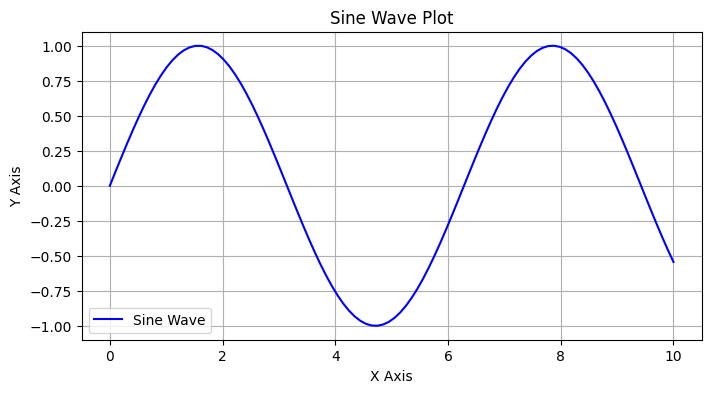

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sine Wave', color='blue')
plt.title('Sine Wave Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid(True)

# Save in different formats
plt.savefig('sine_plot.png')     # Save as PNG
plt.savefig('sine_plot.jpg', dpi=300)  # Save as JPEG with high resolution
plt.savefig('sine_plot.pdf')     # Save as PDF (vector format)

# Show the plot (optional)
plt.show()